## Project Setting

The purpose of this project is to predict wine quality rating based on exploration and analysis of wines from the Vinho Verde region of Portugal, on data from protected designation of origin wine samples collected from May 2004 to February 2007 and tested at the official Vinho Verde interprofessional certification entity (CVRVV).  

This will be done in Python, using different statistical tests, modelling and graphs.

## Executive Summary



## DATA ACQUISITION

- Data was originally obtained as two .cvs files (red wine, white wine) donated by the University of Minho, Portual, to UCI via Data.World.
- After combining the two .cvs files, the newly acquired dataframe represented 6497 rows and 13 columns.
- Each row represented a different red or white wine.
- Each column represented a different feature of the wine — the fixed acidity (g(tartaric acid)/ℓ), the volatile acidity  (g(_acetic acid_)/ℓ), the citric acid (g/ℓ), the residual sugar (g/ℓ), the chlorides (g(_sodium chloride_)/ℓ), the free sulphur dioxide (mg/ℓ), the total sulphur dioxide (mg/ℓ), the density (g/ℓ), the pH, the sulphates (g(_potassium sulphate_)/ℓ), the alcohol (% vol), the quality, the color.


## DATA PREPARATION

- To prepare the data, it was necessary to drop outliers and any unnecessary columns.
- The single categorical column was encoded, with a dummy variable being created. The dummy variable was then concatenated onto the prepared wine dataframe.
- There were no null values.
- Outliers, being a very small percentage in the overall dataset, were dropped according to the Inter Quartile Range (IQR).
- The chlorides column deemed irrelevant to this project and dropped. 
- Features specifically examined were 
    - (1) the relationship between free and total sulphur dioxide, 
    - (2) the levels of citric acid and residual sugar in the wine, 
    - (3) the density of the wine and 
    - (4) total residual sugar in and the density of the wine.
- These were analysed against the target variable of quality rating of the wine.

## Data Dictionary 

|Feature|              Definition|
| :------|:------|
|**fixed_acidity**|             - the acids naturally occuring in grapes (tartaric, malic, citric) or produced by 
| |yeast during fermentation (succinic)|
|**volatile_acidity**|          - measure of the wines gaseous (volatile) acids, the primary one being acetic 
| |                        acid, which is asociated with vinegar ; overall, pronounced volatile acidity 
| |                            is a negative characteristic|                              
|**citric_acid**|               - often added to post-fermentation wine to balance sugar levels and / or to 
| |                            create a sense of vibrancy |
|**rs**|                        - residual sugar : the amount of sugar remaining in the wine after fermentation|
|**chlorides**|                 - indication of the presence of sodium chloride (salinity) of a wine| 
|**free_s02**|                  - sulphur dioxide is an anti-oxidant (preservative) ; free sulphur dioxide is S02 
| |                                added to the wine that has not reacted with other chemical compounds in the 
| |                                wine ; too much added S02 will produce a sulphury smell in the wine|
|**total_s02**|                 - free and bound S02 ; bound S02 has combined with chemical compounds in the wine |
|**density**|                   - a description of the viscosity, related to alcohol, sugar, glycerol and other 
| |                                dissolved solids in the wine ;
| |                            - related to a wine's mouthfeel ; 
| |                            - specifically, 'the mass per unit volume of wine or must at 20°C. It is 
| |                             expressed in grams per milliliter, and denoted by the symbol ρ' (OIV) ; 
| |                            - alternately, a measurement of the sugar content of the grapes before fermentation
|**pH**|                        - a measure of the relative alkilinity vs the relative acidity of a wine ; usually 
| |                            between 3 and 4 pH ; typically, a wine with a high level of acidity will 
| |                            have a low pH level|
|**alcohol**|                   - percentage alcohol by volume in the finished wine|
|**quality (TARGET)**|          - rating / score between 0 and 10, with 10 being the best|

In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import LassoLars

from scipy import stats
from scipy.stats import pearsonr, spearmanr

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.cluster import KMeans

from sklearn.feature_selection import SelectKBest, f_regression, RFE


from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

# import my functions
import prepare
import env
import prepare_xy_split
import selectKBest_rfe_functions
import functions
import wrangle
import functions_backup

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [2]:
red = pd.read_csv('winequality-red.csv')
white = pd.read_csv('winequality-white.csv')

In [3]:
red['color'] = 'red'
red.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red


In [4]:
white['color'] = 'white'
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [5]:
# shape of each df

red.shape, white.shape

((1599, 13), (4898, 13))

In [6]:
# number of nulls in each df

print(f'Red nulls \n{red.isna().sum()}')
print()
print(f'White nulls \n{white.isna().sum()}')


Red nulls 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

White nulls 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64


In [7]:
# merging the csv files

# wine = pd.concat(map(pd.read_csv, ['winequality-red.csv', 'winequality-white.csv']), ignore_index=True)


In [8]:
# concatenating the two dfs with the new columns

# wine = [white, red]
# wine = pd.concat(wine)

wine = pd.concat([white, red], ignore_index = True)



In [9]:
# seeing that both colours are added

wine.color.value_counts()

white    4898
red      1599
Name: color, dtype: int64

In [10]:
# informational description

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [11]:
# statistical description 

wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [12]:
# renaming columns

wine.rename(columns = {'fixed acidity' : 'fixed_acidity', 'volatile acidity' : 'volatile_acidity', 
                       'citric acid' : 'citric_acid', 'residual sugar': 'rs', 'free sulfur dioxide': 'free_s02',
                       'total sulfur dioxide' : 'total_s02'}, inplace = True)

In [13]:
# renamed

wine.head(1)

,fixed_acidity,volatile_acidity,citric_acid,rs,chlorides,free_s02,total_s02,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,white


<AxesSubplot:>

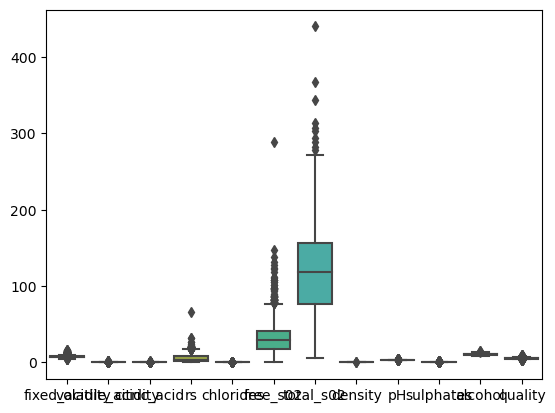

In [14]:
# looking for outliers

sns.boxplot(data = wine)

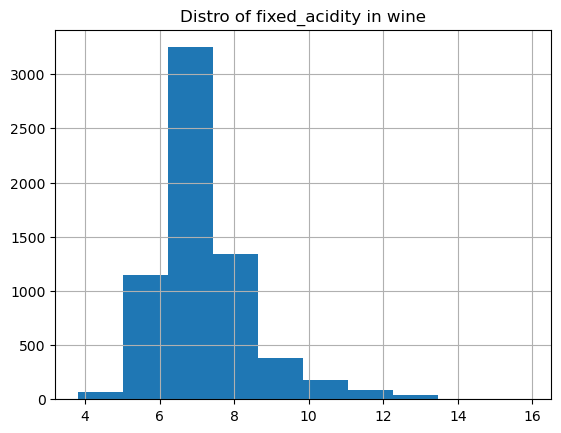

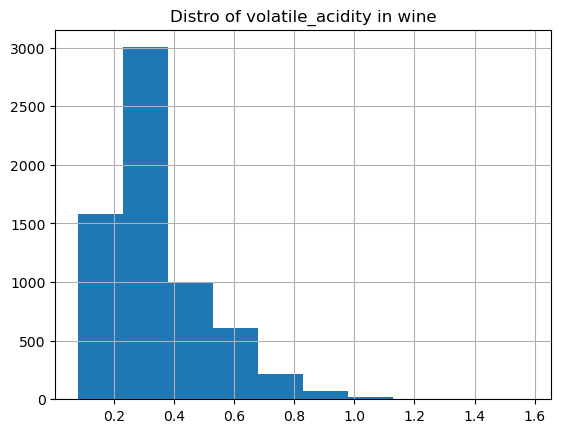

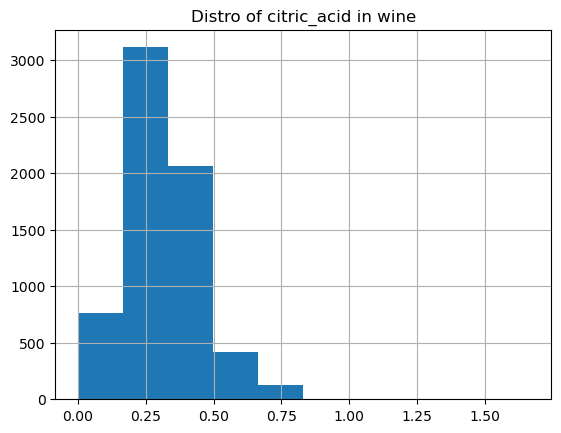

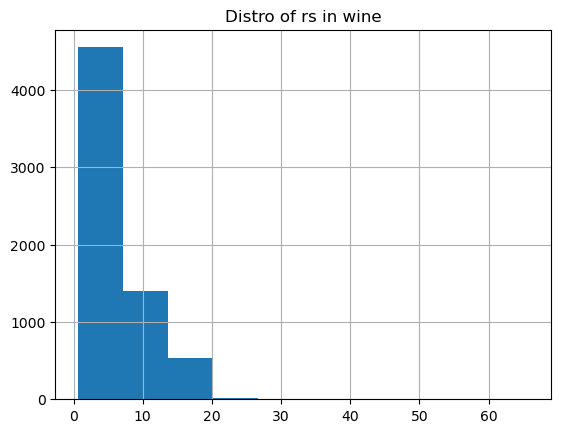

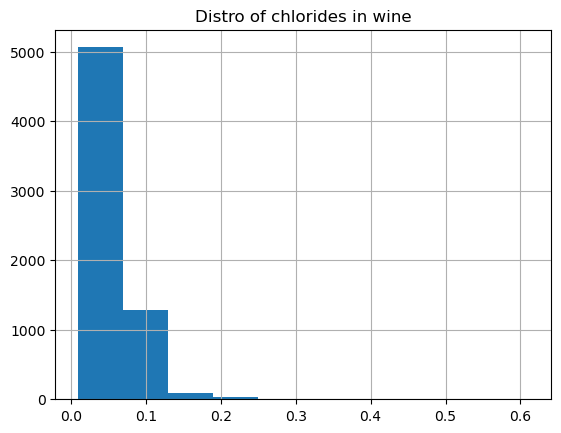

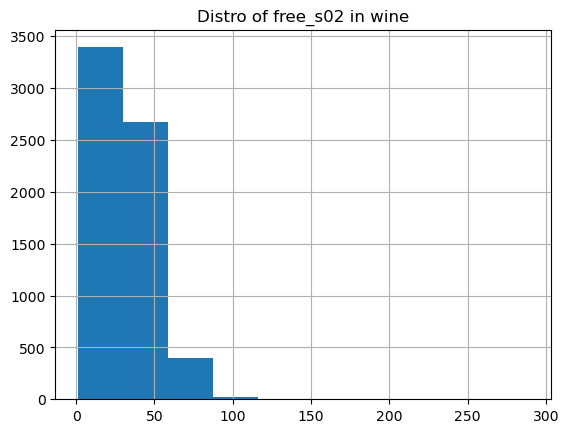

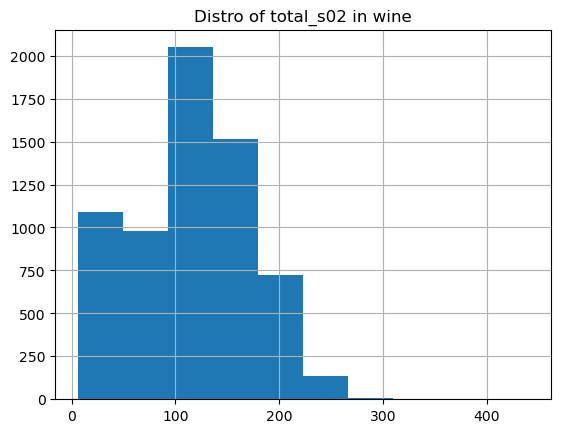

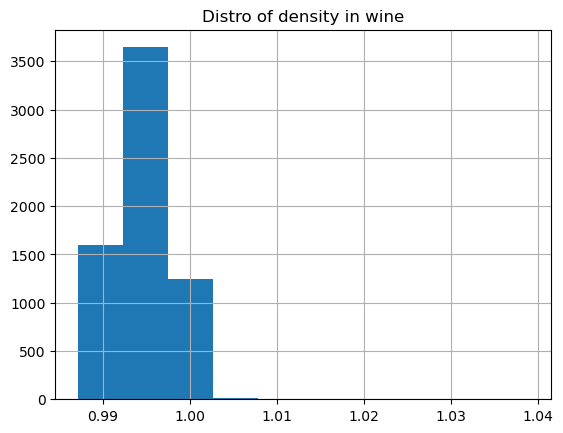

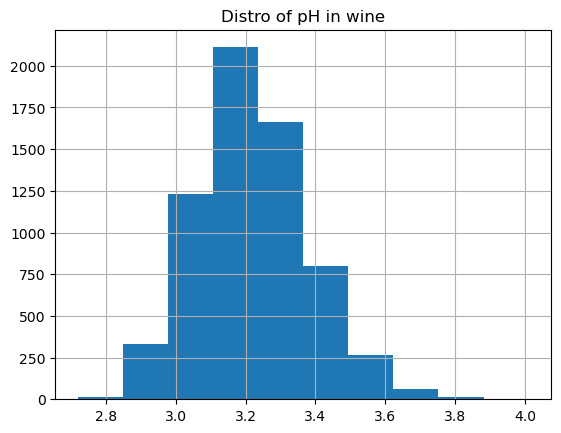

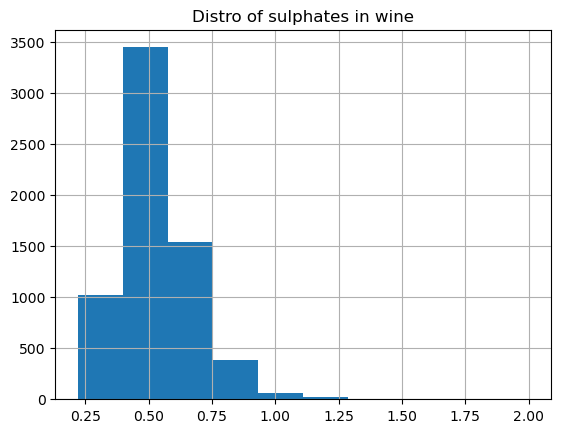

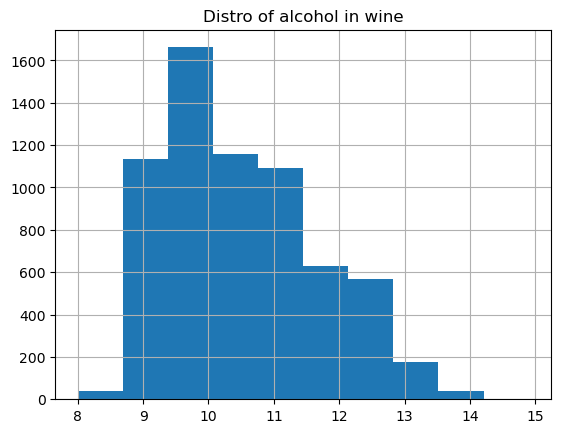

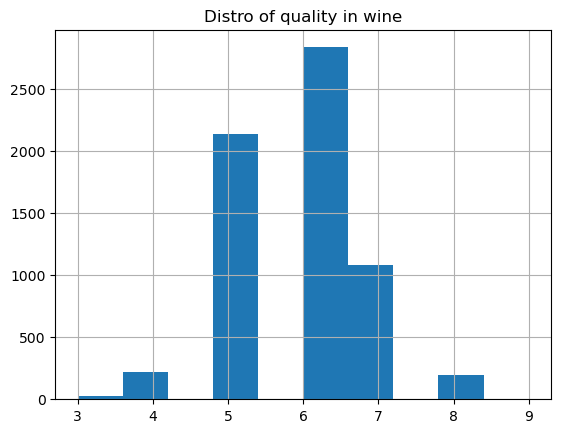

In [15]:
# plotting the numeric columns

num_cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'rs', 'chlorides', 'free_s02', 'total_s02', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

for col in num_cols:
    
    plt.hist(wine[col])
    plt.title(f'Distro of {col} in wine')
    plt.grid()
    plt.show()

In [16]:
def remove_outliers(df, k=2):
    
    '''
    This function is to remove the top 25% and bottom 25% of the data for each column.
    This removes the top and bottom 50% for every column to ensure all outliers are gone.
    '''
    
    a = []
    b = []
    fences = [a, b]
    
    features = []
    col_list = []
    
    i = 0
    
    for col in df:
            new_df = np.where(df[col].nunique() > 8, True, False)
            if new_df == True:
                
                if df[col].dtype == 'float' or df[col].dtype == 'int':
                    '''
                    for each feature find the first and third quartile
                    '''
                    q1, q3 = df[col].quantile([.25, .75])
                    '''
                    calculate inter quartile range
                    '''
                    iqr = q3 - q1
                    '''
                    calculate the upper and lower fence
                    '''
                    upper_fence = q3 + (k * iqr)
                    lower_fence = q1 - (k * iqr)
                    '''
                    appending the upper and lower fences to lists
                    '''
                    a.append(upper_fence)
                    b.append(lower_fence)
                    '''
                    appending the feature names to a list
                    '''
                    features.append(col)
                    '''
                    assigning the fences and feature names to a dataframe
                    '''
                    var_fences = pd.DataFrame(fences, columns = features, 
                                              index = ['upper_fence', 'lower_fence'])
                    col_list.append(col)
                    
                else:
                    print(col)
                    print('column is not a float or int')
                    
            else:
                print(f'{col} column ignored')
                
    '''
    for loop used to remove the data deemed unecessary
    '''
    for col in col_list:
        
        df = df[(df[col] <= a[i]) & (df[col] >= b[i])]
        i += 1
        
    return df, var_fences
     

In [17]:
# calling the function 

wine, var_fences = remove_outliers(wine)

quality column ignored
color column ignored


In [18]:
wine.quality.value_counts()

6    2533
5    1851
7    1004
8     179
4     172
3      13
9       5
Name: quality, dtype: int64

In [19]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,5757.0,7.034176,0.974296,3.90000,6.40000,6.90000,7.50000,10.3000
volatile_acidity,5757.0,0.319750,0.137262,0.08000,0.22000,0.28000,0.38000,0.7400
citric_acid,5757.0,0.307355,0.122002,0.00000,0.25000,0.31000,0.38000,0.6700
rs,5757.0,5.591906,4.715453,0.60000,1.80000,3.40000,8.40000,20.7000
chlorides,5757.0,0.050010,0.018637,0.00900,0.03700,0.04600,0.05700,0.1190
free_s02,5757.0,31.125413,16.437084,1.00000,18.00000,29.00000,42.00000,89.0000
total_s02,5757.0,119.781136,53.638754,6.00000,87.00000,121.00000,157.00000,303.0000
density,5757.0,0.994420,0.002858,0.98711,0.99205,0.99456,0.99666,1.0026
pH,5757.0,3.218933,0.155408,2.72000,3.11000,3.21000,3.32000,3.7200
sulphates,5757.0,0.514530,0.123028,0.22000,0.42000,0.50000,0.59000,0.9400


In [20]:
#Removing the very few super high quality wines and very few super low quality wines

wine = wine[wine.quality != 9]

wine = wine[wine.quality != 3]

In [21]:
#After removing the high and low qualities we only removed 18 lines(13 low, 5 high) from the dataset
wine.shape

(5739, 13)

# Our wine quality categories now range from 4 to 8

In [22]:
wine.quality.value_counts()

6    2533
5    1851
7    1004
8     179
4     172
Name: quality, dtype: int64

In [23]:
# correlation

wine.corr()

,fixed_acidity,volatile_acidity,citric_acid,rs,chlorides,free_s02,total_s02,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.184789,0.224927,-0.071021,0.357396,-0.216615,-0.224479,0.378508,-0.237732,0.182199,-0.120596,-0.097641
volatile_acidity,0.184789,1.000000,-0.438855,-0.188370,0.516304,-0.342204,-0.388926,0.224701,0.256112,0.213767,-0.033140,-0.230810
citric_acid,0.224927,-0.438855,1.000000,0.167138,-0.197575,0.199041,0.269549,0.025369,-0.282480,-0.035505,0.011051,0.090093
rs,-0.071021,-0.188370,0.167138,1.000000,-0.108569,0.429072,0.498226,0.611893,-0.282931,-0.165980,-0.397263,-0.044747
chlorides,0.357396,0.516304,-0.197575,-0.108569,1.000000,-0.260095,-0.341479,0.517553,0.240164,0.344114,-0.347254,-0.263200
free_s02,-0.216615,-0.342204,0.199041,0.429072,-0.260095,1.000000,0.711680,0.116603,-0.168395,-0.148631,-0.195179,0.067856
total_s02,-0.224479,-0.388926,0.269549,0.498226,-0.341479,0.711680,1.000000,0.142080,-0.259219,-0.233621,-0.298677,-0.054430
density,0.378508,0.224701,0.025369,0.611893,0.517553,0.116603,0.142080,1.000000,0.050104,0.213899,-0.756523,-0.325071
pH,-0.237732,0.256112,-0.282480,-0.282931,0.240164,-0.168395,-0.259219,0.050104,1.000000,0.306233,0.087432,0.027356
sulphates,0.182199,0.213767,-0.035505,-0.165980,0.344114,-0.148631,-0.233621,0.213899,0.306233,1.000000,0.004344,0.046815


### Splitting the data into train, validate, test

In [24]:
# creating dummy column for colour

dummies = pd.get_dummies(wine[['color']], drop_first = True)


In [25]:
# concatenating dummies to the wine dataframe

wine = pd.concat([wine, dummies], axis = 1)

In [26]:
# visualising with the dummy colomn

wine.sample(3)

,fixed_acidity,volatile_acidity,citric_acid,rs,chlorides,free_s02,total_s02,density,pH,sulphates,alcohol,quality,color,color_white
3776,6.9,0.33,0.31,7.7,0.040,29.0,135.0,0.99226,3.11,0.57,12.3,5,white,1
726,6.4,0.24,0.31,2.8,0.038,41.0,114.0,0.99155,3.37,0.66,11.7,7,white,1
4884,6.5,0.33,0.38,8.3,0.048,68.0,174.0,0.99492,3.14,0.50,9.6,5,white,1


# Clustering 

### Question 1 : Is overall quality of a given wine related to its free sulphur dioxide, total sulphur dioxide & sulphate levels ?

## Clustering With K Means

### Scaling the data

In [27]:
# splitting

train, val, test = prepare.train_val_test(wine, 'quality')
train.shape, val.shape, test.shape

((4017, 14), (1033, 14), (689, 14))

In [28]:
train_scaled, val_scaled, test_scaled = prepare.scale_splits_rb(train, val, test,
                                        return_scaler = False)

train_scaled.sample(2)

,fixed_acidity,volatile_acidity,citric_acid,rs,chlorides,free_s02,total_s02,density,pH,sulphates,alcohol,quality,color,color_white
5793,0.500000,0.772727,0.014925,0.084577,0.645455,0.298851,0.124579,0.541640,0.70,0.478261,0.396552,6,red,0
4263,0.484375,0.712121,0.074627,0.368159,0.245455,0.206897,0.531987,0.360232,0.54,0.304348,0.655172,6,white,1


In [29]:
# dropping 'color' column to allow for modelling

train_scaled.drop(columns = 'color', inplace = True)

val_scaled.drop(columns = 'color', inplace = True)

test_scaled.drop(columns = 'color', inplace = True)

&nbsp;

# Using K-Means Clustering

## Question 2 : Do the levels of citric acid and residual sugar in a wine have a relationship to its quality ?

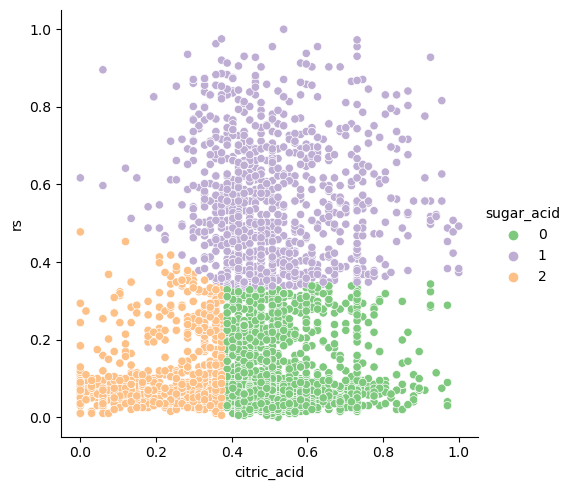

In [30]:
# function to create sugar & citric acid cluster and append it to train_scaled df

functions.cluster_sugar_acid(train_scaled)


In [31]:
# inertia loop

inertia = []
seed = 23

for i in range (1, 7):
    
    # clustering increments
    kmeans = KMeans(n_clusters = i, random_state = seed)
    
    kmeans.fit(train_scaled[['sugar_acid']])
    
    # append the inertia
    inertia.append(kmeans.inertia_)

In [32]:
# creating a df for the sugar-citric acid features

inertia_sca_df = pd.DataFrame({'n_clusters' : list(range(1,7)),
                               'inertia' : inertia})
inertia_sca_df

,n_clusters,inertia
0,1,2.543531e+03
1,2,5.186943e+02
2,3,1.899577e-26
3,4,2.032435e-26
4,5,2.179414e-26
5,6,2.184428e-26


In [33]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,rs,chlorides,free_s02,total_s02,density,pH,sulphates,alcohol,quality,color,color_white
983,5.7,0.360,0.34,4.2,0.026,21.0,77.0,0.99070,3.41,0.45,11.9,6,white,1
3196,6.4,0.220,0.38,9.1,0.044,35.0,127.0,0.99326,2.97,0.30,11.0,7,white,1
4814,5.7,0.400,0.35,5.1,0.026,17.0,113.0,0.99052,3.18,0.67,12.4,6,white,1
5594,7.0,0.650,0.02,2.1,0.066,8.0,25.0,0.99720,3.47,0.67,9.5,6,red,0
5813,8.6,0.315,0.40,2.2,0.079,3.0,6.0,0.99512,3.27,0.67,11.9,6,red,0


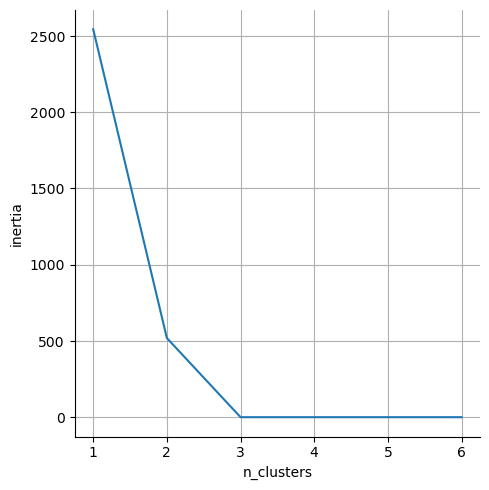

In [34]:
# elbow of the better number of k

sns.relplot(data = inertia_sca_df, x = 'n_clusters', y = 'inertia', kind = 'line')
plt.grid()
plt.show()

**Takeaway : It appears that, when comparing sugar and citric acid to a wine's quality rating, the idea number of clusters is 3.**

&nbsp;

## Question 1 : Do free sulphur dioxide and total sulphur dioxide levels have a relationship to wine quality ?

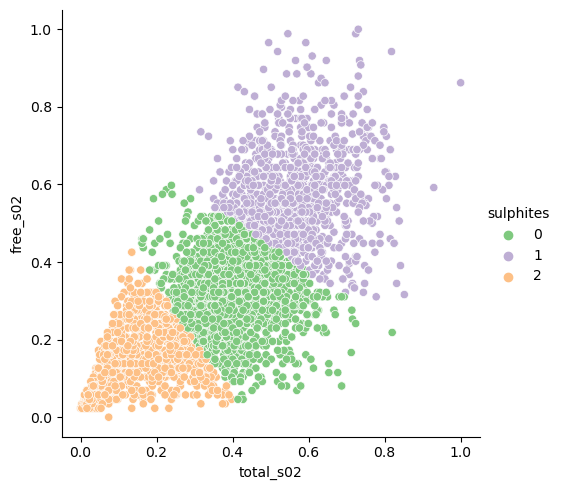

In [35]:
# function to create free & total sulphur dioxide cluster and append it to train_scaled df

functions.cluster_sulphites(train_scaled)

In [36]:
# inertia loop

inertia = []
seed = 23

for i in range (1, 7):
    
    # clustering increments
    kmeans = KMeans(n_clusters = i, random_state = seed)
    
    kmeans.fit(train_scaled[['sulphites']])
    
    # append the inertia
    inertia.append(kmeans.inertia_)

In [37]:
# creating a df for the sugar-citric acid features

inertia_sulph_df = pd.DataFrame({'n_clusters' : list(range(1,7)),
                               'inertia' : inertia})
inertia_sulph_df

,n_clusters,inertia
0,1,2.705562e+03
1,2,5.359888e+02
2,3,1.196785e-26
3,4,1.312225e-26
4,5,1.240886e-26
5,6,1.312661e-26


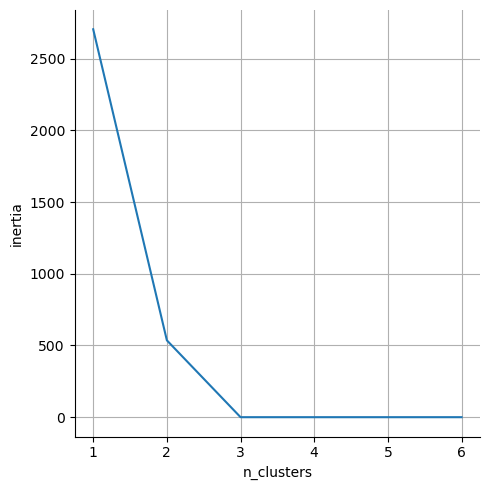

In [38]:
# elbow of the better number of k

sns.relplot(data = inertia_sulph_df, x = 'n_clusters', y = 'inertia', kind = 'line')
plt.grid()
plt.show()

**Takeaway : It appears that 3 is the best number of clusters.**

&nbsp;

## Question 4 : Do the total residual sugar in and the density of the wine have a relationship to its quality ?

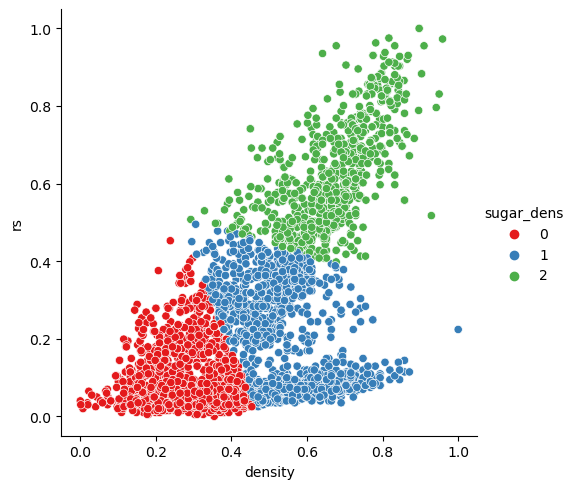

In [39]:
# function to create sugar & density cluster and append it to train_scaled df

functions.cluster_sug_dens(train_scaled)

In [40]:
# inertia loop

inertia = []
seed = 23

for i in range (1, 7):
    
    # clustering increments
    kmeans = KMeans(n_clusters = i, random_state = seed)
    
    kmeans.fit(train_scaled[['sugar_dens']])
    
    # append the inertia
    inertia.append(kmeans.inertia_)

In [41]:
# creating a df for the sugar-citric acid features

inertia_sd_df = pd.DataFrame({'n_clusters' : list(range(1,7)),
                               'inertia' : inertia})
inertia_sd_df

,n_clusters,inertia
0,1,2.329582e+03
1,2,5.666159e+02
2,3,1.543322e-26
3,4,1.541891e-26
4,5,1.633522e-26
5,6,1.541891e-26


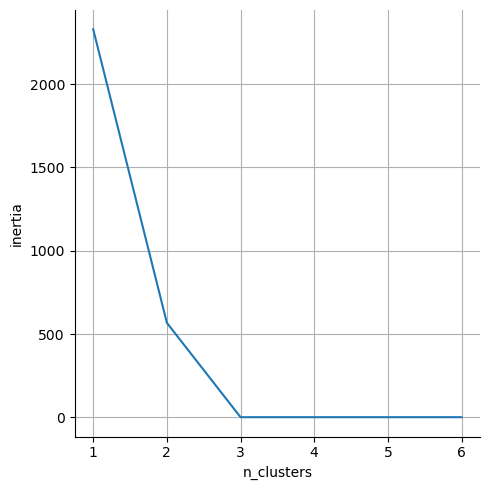

In [42]:
# elbow of the better number of k

sns.relplot(data = inertia_sd_df, x = 'n_clusters', y = 'inertia', kind = 'line')
plt.grid()
plt.show()

**Takeaway : It appears that 3 is the best number of clusters.**

&nbsp;

## Question 2 : Do the levels of citric acid and residual sugar in a wine have a relationship to its quality ?
## Using K-Means Clustering

&nbsp;

# Classification, part I
## Using Decision Tree

In [43]:
# splitting train, val, test into X and y

X_train, y_train, X_val, y_val, X_test, y_test = prepare_xy_split.tts_xy(train_scaled, 
                                                                         val_scaled, test_scaled, 'quality')

X_train.sample(3)


,fixed_acidity,volatile_acidity,citric_acid,rs,chlorides,free_s02,total_s02,density,pH,sulphates,alcohol,color_white,sugar_acid,sulphites,sugar_dens
5213,0.500000,0.409091,0.432836,0.094527,0.790909,0.218391,0.158249,0.586830,0.70,0.579710,0.448276,0,0,2,1
5635,0.671875,0.772727,0.000000,0.094527,0.763636,0.206897,0.175084,0.845061,0.78,0.579710,0.155172,0,2,2,1
4458,0.421875,0.409091,0.388060,0.104478,0.327273,0.206897,0.414141,0.155584,0.52,0.333333,0.793103,1,0,0,0


### Baseline for the Decision Tree model

In [44]:
# transforming y_train, y_val into DFs to allow for modelling

y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)

# assuring that it worked
y_train.head(1)

,quality
983,6


In [45]:
# determining the most common quality score

quality_baseline = train.quality.value_counts()
quality_baseline


6    1773
5    1296
7     703
8     125
4     120
Name: quality, dtype: int64

**A quality score of 6 is the most common, with 1778 wines.**

In [46]:
# setting the baseline for quality to 6

quality_baseline = (train_scaled['quality'] == 6).mean()

print(f'The baseline of about {round(quality_baseline, 4)} indicates ' + 
      'the likelihood that a wine will score a 6 for its quality rating.')

The baseline of about 0.4414 indicates the likelihood that a wine will score a 6 for its quality rating.


In [47]:
# initialise the Decision Tree Classifier = clf

seed = 23

clf5 = DecisionTreeClassifier(max_depth = 11, random_state = seed)

In [48]:
### fitting the model : 

clf5 = clf5.fit(X_train, y_train)

In [49]:
# Examining accuracy of Decision Tree Classifier model

# allows for discrete with continuous 
from sklearn.multioutput import MultiOutputClassifier

clf5 = MultiOutputClassifier(clf5, n_jobs = -1)
clf5.fit(X_train, y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier(max_depth=11,
                                                       random_state=23),
                      n_jobs=-1)

In [50]:
# accurcy of the decision tree model
print(f'Accuracy for Training Dataset, max depth of 5 : {round(clf5.score(X_train, y_train), 4)}')


Accuracy for Training Dataset, max depth of 5 : 0.815


**The accuracy of the Decision Tree Classifier with 11 branches is about 81.4pc.**  
**The baseline of about 44.26pc indicated the likelihood that a wine will score a 6 for its quality rating. From this, it is clear that the Decision Tree model is more accurate, by 37.14pc, than the baseline prediction.**

&nbsp;

# Classification, part II
## Using Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
random = RandomForestClassifier(max_depth = 11, random_state = 23,
                           max_samples = 0.5)        
                            # 50pc of all observations will be placed into each random sample

In [53]:
random.fit(X_train, y_train)

# training the random forest on the data

RandomForestClassifier(max_depth=11, max_samples=0.5, random_state=23)

In [54]:
random.score(X_train, y_train)

# scoring the accuracy of the training set

# accurcy of the decision tree model
print(f'Accuracy for Validate Dataset, max depth of 11 : {round(random.score(X_train, y_train), 4)}')

Accuracy for Validate Dataset, max depth of 11 : 0.8392


In [55]:
random.feature_importances_

# model is ranking in feature importance according to how helpful it is in making predictions

array([0.0688672 , 0.09709328, 0.07125691, 0.07866244, 0.0809063 ,
       0.08133045, 0.0803958 , 0.10080389, 0.07768147, 0.07731442,
       0.13927307, 0.00385068, 0.01278897, 0.01374291, 0.01603223])

In [56]:
# creating df of importance listing

test_important_df = pd.DataFrame({'feature': X_train.columns.tolist(),  # naming X_train features, sent to a list
                             'importance': random.feature_importances_}) 
                                  # matching the order of features in X_train to the importance

In [57]:
# sorting important features

test_important_df.sort_values('importance', ascending = False).head(5)

,feature,importance
10,alcohol,0.139273
7,density,0.100804
1,volatile_acidity,0.097093
5,free_s02,0.081330
4,chlorides,0.080906


**Takeaway : The Random Forest model with a maximum depth of 11 branches has an accuracy of 0.835 for the training dataset.  It indicates that the top three features in importance are 'alcohol', 'density' and 'volatile_acidity'.**

&nbsp;

**CLASSIFICATION TAKEAWAYS :**

**The Random Forest model with 11 branches had an accuracy rate of 83.5pc. The accuracy of the Decision Tree  with 11 branches was about 81.4pc. With an accuracy that is 2.1pc better than the Decision Tree model, the Random Forest wins out in the Classification modelling.**

**Both models are more accurate than the baseline prediction, with the Random Forest model at 11 branches, at an accuracy of 83.5pc, being 39.36pc more accurate than the baseline prediction of 44.14pc.**

&nbsp;

# Regression

## Question 2, part I : Do the levels of citric acid and residual sugar in the wine have no relationship to its quality ?

### Object of least squares (OLS) on Linear Regression

In [58]:
# ols function on train + residual sugar & citric acid cluster

functions.quality_ols(train_scaled, 'sugar_acid')


The RMSE on the baseline of density against wine quality is 0.8488.
The RMSE for the OLS Linear Regression model was 0.8304.


**TAKEAWAY, OLS FOR SUGAR & CITRIC ACID CLUSTER :**
**The RMSE for the OLS Linear Regression model on sugar & citric acid was 0.8304. This was slightly lower, and thus, more accurate, than the RMSE on the baseline (0.8488). The OLS model was a 0.0184 improvement on the baseline.**

&nbsp;

## Question 2, part II : Do the levels of citric acid and residual sugar in the wine have no relationship to its quality ?

### TweedieRegressor on Linear Regression

In [98]:
# tweedie regressor function on train + residual sugar & citric acid cluster

def tweedie_sugar_acid(df, X_df, y_df):

    # baseline on mean
    baseline_pred_sca = round(df['quality'].mean(), 3)
    
    tweedie_sca = TweedieRegressor()

    # fit the created object to training dataset

    tweedie_sca.fit(X_df, y_df)

    predictions_sca_df = df[['sugar_acid', 'quality']]

    # then predict on X_train

    predictions_sca_df['tweedie_sca'] = tweedie_sca.predict(X_df)

    predictions_sca_df['baseline_pred_sca'] = baseline_pred_sca


    # check the error against the baseline

    tweedie_sca_rmse = sqrt(mean_squared_error(predictions_sca_df['quality'], predictions_sca_df['tweedie_sca']))

    print(f'The RMSE for the Tweedie Regressor model was {round(tweedie_sca_rmse, 4)}.')


    # finding the error cf the baseline

    sca_qual_rmse = sqrt(mean_squared_error(predictions_sca_df['quality'], predictions_sca_df['baseline_pred_sca']))

    print(f'The RMSE on the baseline of sugar & citric acid against wine quality is {round(sca_qual_rmse,4)}.')


In [ ]:
# plotting to look at the data

plt.hist(y_train)

In [100]:
tweedie_sugar_acid(train_scaled, X_train, y_train)

The RMSE for the Tweedie Regressor model was 0.8193.
The RMSE on the baseline of sugar & citric acid against wine quality is 0.8488.


This is a normal distribution.

**TAKEAWAY, TWEEDIE REGRESSOR FOR SUGAR & CITRIC ACID CLUSTER : The RMSE for the Tweedie Regressor Linear Regression model on the sugar & citric acid cluster was 0.8193. This was a 0.0295 improvement on the RMSE of the baseline for this cluster.**

&nbsp;

### OVERALL REGRESSION TAKEAWAYS FOR SUGAR & CITRIC ACID CLUSTER ON TRAIN :

**The RMSE for the OLS Linear Regression model on sugar & citric acid was 0.8304. The RMSE for the Tweedie Regressor model was 0.8193. The RMSE on the baseline of sugar & citric acid against wine quality is 0.8488. Both the OLS and the Tweedie Regressor models were more accurate in their predictions of wine quality rating than the baseline.**  

**Of the two models, the Tweedie Regressor model was the more accurate, by 0.0111, than the OLS model. The Tweedie model was 0.0295 more accurate than the baseline.**

&nbsp;

## COMPARING OLS & TWEEDIE REGRESSOR ON VALIDATE

In [102]:
functions.sugar_acid_col(val_scaled).sample(3)

val_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,rs,chlorides,free_s02,total_s02,density,pH,sulphates,alcohol,quality,color_white,sugar_acid
3106,0.578125,0.287879,0.776119,0.129353,0.309091,0.310345,0.491582,0.269852,0.30,0.405797,0.517241,6,1,0
1315,0.656250,0.181818,0.537313,0.452736,0.318182,0.712644,0.525253,0.638476,0.38,0.304348,0.275862,6,1,1
5651,0.687500,0.863636,0.149254,0.114428,0.727273,0.183908,0.114478,0.704971,0.57,0.434783,0.189655,5,0,2
3274,0.343750,0.212121,0.462687,0.039801,0.272727,0.448276,0.414141,0.311168,0.73,0.492754,0.431034,5,1,0
3736,0.406250,0.363636,0.716418,0.368159,0.154545,0.195402,0.276094,0.279535,0.50,0.782609,0.741379,4,1,1


In [103]:
# ols funtion on train + residual sugar & citric acid cluster

functions.quality_ols(val_scaled, 'sugar_acid')

The RMSE on the baseline of density against wine quality is 0.8379.
The RMSE for the OLS Linear Regression model was 0.81.


# Regression
## Question 3, part I : Does the density of a wine have a relationship to its quality ?  
### Object of least squares (OLS) on Linear Regression

In [69]:
# def sca_ols(df):
    
#         # getting mean of target variable

#     baseline_pred_sca = round(train_scaled['quality'].mean(), 3)

#     # create a dataframe

#     predictions_sca_df = train_scaled[['sugar_acid', 'quality']]

#     # MAKE NEW COLUMN ON DF FOR BASELINE PREDICTIONS

#     predictions_sca_df['baseline_pred_sca'] = baseline_pred_sca

#     # our linear regression model

#     ols_model_sca = LinearRegression()

#     ols_model_sca.fit(train_scaled[['sugar_acid']], train_scaled[['quality']])

#     # predicting on density after it's been fit

#     ols_model_sca.predict(train_scaled[['sugar_acid']])

#     # model predictions from above line of codes with 'yhat' as variable name and append it on to df
#     predictions_sca_df['yhat'] = ols_model_sca.predict(train_scaled[['sugar_acid']])

#     # the residual column tells how far from the baseline we are from the actual

#     predictions_sca_df['baseline_res_sca'] = predictions_sca_df['baseline_pred_sca'] - predictions_sca_df['quality'] 


#     # finding the RMSE (x = original, y = prediction)

#     sca_qual_rmse = sqrt(mean_squared_error(predictions_sca_df['quality'], predictions_sca_df['baseline_pred_sca']))
#     print(f'The RMSE on the baseline of sugar & citric acid against wine quality is {round(sca_qual_rmse,4)}.')

#     # RMSE of linear regression model

#     OLS_rmse_sca = mean_squared_error(predictions_sca_df['yhat'], predictions_sca_df['quality'], squared = False)

#     print(f'The RMSE for the OLS Linear Regression model on sugar & citric acid was {round(OLS_rmse_sca, 4)}.')


In [104]:
sca_ols(val_scaled)

The RMSE on the baseline of sugar & citric acid against wine quality is 0.8488.
The RMSE for the OLS Linear Regression model on sugar & citric acid was 0.8304.


In [90]:
# def tweedie_sca(df):

#     # baseline on mean
#     baseline_pred_sca = round(train_scaled['quality'].mean(), 3)
    
#     tweedie_sca = TweedieRegressor()

#     # fit the created object to training dataset

#     tweedie_sca.fit(X_train, y_train)

#     predictions_sca_df = df[['sugar_acid', 'quality']]

#     # then predict on X_train

#     predictions_sca_df['tweedie_sca'] = tweedie_sca.predict(X_train)

#     predictions_sca_df['baseline_pred_sca'] = baseline_pred_sca


#     # check the error against the baseline

#     tweedie_sca_rmse = sqrt(mean_squared_error(predictions_sca_df['quality'], predictions_sca_df['tweedie_sca']))

#     print(f'The RMSE for the Tweedie Regressor model was {round(tweedie_sca_rmse, 4)}.')


#     # finding the error cf the baseline

#     sca_qual_rmse = sqrt(mean_squared_error(predictions_sca_df['quality'], predictions_sca_df['baseline_pred_sca']))

#     print(f'The RMSE on the baseline of sugar & citric acid against wine quality is {round(sca_qual_rmse,4)}.')


In [105]:
tweedie_sugar_acid(val_scaled, X_val, y_val)

The RMSE for the Tweedie Regressor model was 0.8223.
The RMSE on the baseline of sugar & citric acid against wine quality is 0.8379.


In [106]:
# ols funtion on train + density

functions.quality_ols(train_scaled, 'density')

The RMSE on the baseline of density against wine quality is 0.8488.
The RMSE for the OLS Linear Regression model was 0.8064.


**TAKEAWAY, DENSITY AGAINST QUALITY ON OLS :**  

**The RMSE on the baseline of density against wine quality is 0.8488. The RMSE for the OLS Linear Regression model was 0.8064. The difference between the actual and the predicted quality score was 0.8064 for the OLS Linear Regression model. This means that the OLS model is 0.0423 more accurate than the baseline in regards to density and quality on the training dataset.**

&nbsp;

## Question 3, part II : Does the density of a wine have a relationship to its quality ?  
### General Linear Regression, Tweedie Regressor

In [ ]:
# plotting to look at the data

plt.hist(y_train)

Distribution appears normal.

In [ ]:
# tweedie regression function on train + density

functions.quality_tweed(train_scaled, X_train, y_train, 'density')

**The difference between the actual and the predicted quality score was 0.83 for the Tweedie Regressor model.**

**Takeaway : The Tweedie Regressor model is 0.0188 more accurate than the baseline, or a 1.88pc improvement on the baseline prediction.**

**REGRESSION MODELLING TAKEAWAYS :**  

**The Linear Regression OLS model, with an RMSE of 0.8064, was 0.0424 more accuate than the baseline (0.8488) on the train dataset. The Tweedie Regressor model on the train dataset, with an RMSE result of 0.83, was 0.0236 less accurate than Linear Regression OLS. Both models were more accurate than the baseline.**

&nbsp;

# Running The Top Models : OLS & TweedieRegressor

## OLS On The Validate Dataset

In [ ]:
# ols funtion on validate + density

functions.quality_ols(val_scaled, 'density')

**Takeaway :**  

**The RMSE of density against wine quality baseline was 0.8379 on the validate dataset. The RMSE for the OLS Linear Regression model was 0.7873 on the validate dataset.**  

**The difference on the validation dataset between the actual and the predicted quality score on the validation dataset was 0.0506 for the OLS Linear Regression model. This means that the OLS model on the validate dataset was 0.0506 more accurate than the baseline.**

## TweedieRegressor On The Validate Dataset

In [ ]:
# plotting to look at the data

plt.hist(y_val)

**The data appears to be normally distributed.**

In [ ]:
# Tweedie Regressor function on validate + density

functions.quality_tweed(val_scaled, X_val, y_val, 'density')


**TAKEAWAY : The RMSE for the Tweedie Regressor model was 0.8223 on the validate dataset in regards to the density of the wine having a relationship to its quality. This is 0.0156 more accurate than the baseline RMSE for density on quality.**
    


**VALIDATION DATASET REGRESSION MODELLING TAKEAWAYS :**  

**The Linear Regression model, with an RMSE of 0.7873, was 0.0615 more accuate than the baseline (RMSE 0.8379) for the validate dataset for density on quality. The Tweedie Regressor model for the validate dataset was also more accurate than the baseline RMSE, but it was less accurate (RMSE 0.8223) than the Linear Regression model (RMSE 0.7873) for density on quality.**  

# Feature Selection Using SelectKBest and Recursive Feature Engineering 

## SelectKBest on features in the hypotheses

In [ ]:
# running selectKBest on hypotheses features

selectKBest_rfe_functions.select_best(train, ['total_s02', 'rs', 'citric_acid', 
                                              'density', 'free_s02'], 
                                              'quality', 2)

**TAKEAWAY : According to the SelectKBest feature selection method, 'citric_acid' and 'density' would be the highest positive correlation to wine quality rating.**

## RFE on features in the hypotheses

In [ ]:
# RFE on training dataset

selectKBest_rfe_functions.rfe_function(train, 3, 'quality', dummy_columns = ['color']).head(5).T

The RFE model indicates that chlorides, density and sulphates have the highest influence in predicting a given wine's quality rating.

**TAKEAWAY :** 

**SelectKBest indicates that the features 'citric_acid' and 'density' have the highest influence on the quality score of a given wine.  However, recursive feature elimination (RFE) indicates that the highest influencers on a given wine's quality score are 'chlorides', 'density' and 'sulphates'.**  

**From this, we can determine that further exploration, statistical testing and modelling needs to be done in order to truly determine quality influencers.**